This notebook follows on from the third notebook in this series *03 The determinant*. Here we will be looking at useful operations and definitions of matrices, including things like matrix inverse and matrix rank

### Load libraries and setup plotting function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_setup(ax,xlim=[-2,4],ylim=[-2,4],xcoords=[1,0.4],ycoords=[0.4,0.95],grid=True): 
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    if grid:
        ax.grid(grid,alpha=.3)        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(np.arange(xlim[0],xlim[1]+1, 1))
    ax.set_yticks(np.arange(ylim[0], ylim[1]+1, 1))
    ax.set_xlabel('$x_1$',fontsize=12)
    ax.set_ylabel('$x_2$',rotation=0,labelpad=15,fontsize=12)
    ax.xaxis.set_label_coords(xcoords[0],xcoords[1])
    ax.yaxis.set_label_coords(ycoords[0],ycoords[1])
    return ax

### Linear systems of equations

Consider the following sets of linear equations:

\begin{aligned}
& 2x + 5y + 3z = -3 \\
& 4x + 0y + 8z = 0 \\
& 1x + 3y + 0z = 2.
\end{aligned}

Here we have three unknown variables $x$, $y$, and $z$, and a list of 3 equations relating each of them. What makes these equations linear is that each unknown is being scaled by a real number, and that the terms in each equation are being added. In other words, there are no non-linear terms such as $xy$, $z^3$, or $sin(x)$.

Another way to represent these linear systems of equations, is through matrix-vector multiplication:

\begin{equation}
\begin{bmatrix} 2 & 5 & 3 \\ 4 & 0 & 8 \\ 1 & 3 & 0 \end{bmatrix}\begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} -3 \\ 0 \\ 2 \end{bmatrix}, 
\end{equation}

or you might recognise this in a more familiar form (recall notebook *02 Introduction to matrices*):

\begin{equation}
\pmb{M}\pmb{x} = \tilde{\pmb{x}}.
\end{equation}

Based on what we have already learned, we can recognise that, geometrically, what we want to do here is find the vector $\pmb{x}$, such that after we pass it through the transformation $\pmb{M}$, we get the vector $\tilde{\pmb{x}}$. Let's look at a 2D example for ease of visualisation:

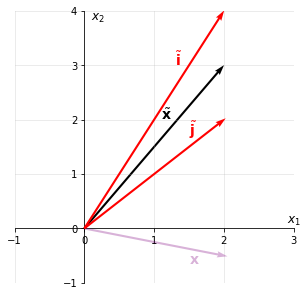

In [102]:
from mpl_toolkits.mplot3d import Axes3D

M = np.array([[2,4],[2,2]])
x_t = np.array([2,3])
x = np.dot(np.linalg.inv(M),x_t)


fig,ax = plt.subplots(1,figsize=(5,5))
ax = plot_setup(ax,[-1,3],[-1,4],xcoords=[1,0.25],ycoords=[0.3,0.95])
ax.scatter([0,x_t[0]],[0,x_t[1]],color='w')
ax.quiver(0,0,x_t[0],x_t[1],units='xy',angles='xy',scale=1.02)
ax.quiver(0,0,x[0],x[1],units='xy',angles='xy',scale=0.86,color='purple',zorder=1000,alpha=0.3)
ax.quiver(0,0,M[0,0],M[0,1],units='xy',angles='xy',scale=1.05,color='r',zorder=1000)
ax.quiver(0,0,M[1,0],M[1,1],units='xy',angles='xy',scale=0.96,color='r',zorder=1000)
ax.text(1.1,2,r'$\tilde{\mathbf{x}}$',color='k',fontsize=14)
ax.text(1.5,-0.65,r'$\mathbf{x}$',color='purple',fontsize=14,alpha=0.3)
ax.text(1.3,3,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
ax.text(1.5,1.7,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
plt.show()

### The matrix inverse

Here we can see our observed vector in black, $\tilde{\pmb{x}}$, and the location of our basis (unit) vectors $\tilde{\pmb{i}}$ and $\tilde{\pmb{j}}$, which describe the linear tranformation $\pmb{M}$. The vector $\pmb{x}$ is then unknown and is what we would like to recover. To reiterate, $\tilde{\pmb{x}}$ is the vector that we get by passing $\pmb{x}$ through the linear transformation $\pmb{M}$.

The way we compute the vector $\pmb{x}$ is by reversing the linear transformation performed by $\pmb{M}$, or rather, computing the matrix inverse:

\begin{equation}
\pmb{x} = \pmb{M}^{-1}\tilde{\pmb{x}}.
\end{equation}

In this notebook we aren't going to worry about the specifics of how to actually compute this inverse and will just rely on the numpy function *numpy.linalg.inv()*. Instead we will focus on what specific properties of matrices are required in order for us to be able to invert them.

Thinking about the inverse matrix as a reverse linear transformation, we can understand that if we apply the following two transformations $\pmb{M}^{-1}\pmb{M}$ through matrix multiplication, we end where we we started. There is a special name for this type of composition matrix, and it is the *indentity* matrix $\pmb{I}$:

\begin{equation}
\pmb{I} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}.
\end{equation}

The identity matrix is a square matrix with values of 1 along the diagonal and zeros on all off-diagonal elements. This corresponds to applying no transformation, i.e., doing nothing. Therefore we can see now that what we're really doing when solving the system of linear equations is:

\begin{equation}
\pmb{M}\pmb{x} = \tilde{\pmb{x}} \\
\pmb{M}^{-1}\pmb{M}\pmb{x} = \pmb{M}^{-1}\tilde{\pmb{x}} \\
\pmb{I}\pmb{x} = \pmb{M}^{-1}\tilde{\pmb{x}} \\
\pmb{x} = \pmb{M}^{-1}\tilde{\pmb{x}}.
\end{equation}

### The role of the determinant

In the above examples the linear transformation given by $\pmb{M}$ has had a non-zero determinant, which means that the transformation does not reduce the dimensionality of the vector $\pmb{x}$. 

### Upcoming...

Now that we better understand the various properties of matrices, in the next notebook we will look at more useful computations such as cross and dot product of matrices and vectors